In [1]:
import json
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

all_listings = json.loads(pathlib.Path('./all_listings.json').read_text())
df = pd.DataFrame(all_listings)

In [2]:
#format table
CITY_TRANSLATIONS = {'קרית אונו': 'Kiryat Ono', 'חולון': 'Holon', 'תל אביב יפו': 'Tel Aviv Yafo', 'פתח תקווה': 'Petah Tikva',
                    'רמת גן': 'Ramat Gan', 'בת ים': 'Bat Yam', 'ראשון לציון': 'Rishon LeTsiyon', 'לוד': 'Lod', 'רמלה': 'Ramle',
                    'בני ברק': 'Bnei Brak', 'ראש העין': 'Rosh HaAyin', 'מודיעין מכבים רעות': 'Modiin Maccabim Reut',
                    'גבעתיים': 'Givataim', 'אור יהודה': 'Or Yehuda', 'באר יעקב': 'Be\'er Ya\'akov', 'אלעד': 'Elad',
                    'יהוד מונוסון': 'Yehud Monosson', 'גבעת שמואל': 'Giv\'at Shmuel', 'גני תקווה': 'Ganei Tikva',
                    'אזור': 'Azor', 'בית דגן': 'Beit Dagan', 'שוהם': 'Shoham', 'הרצליה': 'Herzliya', 'הוד השרון': 'Hod HaSharon',
                    'נתניה': 'Netanya', 'כפר סבא': 'Kfar Saba', 'רעננה': 'Ra\'anana', 'כפר יונה': 'Kfar Yona',
                    'צור יצחק': 'Tsur Itshak', 'תל מונד': 'Tel Mond', 'קדימה צורן': 'Kadima Tsoran',
                    'רמת השרון': 'Ramat HaSharon', 'טייבה': 'Taibe', 'צור משה': 'Tsur Moshe'}
df.city = [CITY_TRANSLATIONS[city] for city in df.city]
df.date_listed = pd.to_datetime(df.date_listed)

In [3]:
CITIES_BLACKLIST = {'Ramle', 'Lod', 'Elad', 'Netanya'}
# CITIES_BLACKLIST = {}
MIN_AMOUNT_OF_LISTINGS_IN_CITY = 9

# drop erroneos extreme rows to clean data set
df = df[(df.area < df.area.mean() * 5) & (df.area > df.area.mean() / 5)]
df = df[df.date_listed > (pd.Timestamp.today() - pd.Timedelta(16, unit='W'))]
listing_count_by_city = df.city.value_counts()
# print(listing_count_by_city)
cities_to_ignore = CITIES_BLACKLIST | \
    set(listing_count_by_city.loc[lambda listing_count: listing_count < MIN_AMOUNT_OF_LISTINGS_IN_CITY].index)
df = df[~df.city.isin(cities_to_ignore)]
df = df.reset_index(drop=True)
display(df)
df.describe()

,date_listed,city,neighborhood,street,coordinates,floor,rooms,area,price
0,2022-12-12 08:22:26,Kfar Saba,ארלוזורוב,גאולה,"{'latitude': 32.173921, 'longitude': 34.899314}",2,4,110,2850000
1,2022-12-19 22:21:56,Ra'anana,מרכז דרום,הרצוג,"{'latitude': 32.179599, 'longitude': 34.87328}",0,4,106,2700000
2,2022-12-09 12:12:02,Kfar Saba,ארלוזורוב,אברהם קרן,"{'latitude': 32.170754, 'longitude': 34.91112}",2,4,121,2990000
3,2022-12-05 14:05:33,Tsur Itshak,צור יצחק,נחל אלכסנדר,"{'latitude': 32.2390738181818, 'longitude': 34...",6,4,138,2450000
4,2022-12-04 14:31:01,Ra'anana,קרית ויצמן,None,"{'latitude': 32.185308, 'longitude': 34.866941}",1,4,132,2870000
...,...,...,...,...,...,...,...,...,...
4479,2022-12-05 15:43:06,Modiin Maccabim Reut,המגינים,חטיבת גבעתי,"{'latitude': 31.9113633658537, 'longitude': 35...",2,4,106,2850000
4480,2022-10-27 14:37:11,Petah Tikva,None,None,"{'latitude': 32.084951, 'longitude': 34.886825}",3,3,70,1620000
4481,2022-12-21 13:45:11,Rishon LeTsiyon,נאות שקמה,הרבי מלובביץ',"{'latitude': 31.9742821923077, 'longitude': 34...",1,3,72,2649000
4482,2022-10-03 14:42:29,Bat Yam,"דרום חדש, פארק הים",נעמי שמר,"{'latitude': 32.007124, 'longitude': 34.740614}",16,3,70,2990000


,floor,rooms,area,price
count,4484.000000,4484.000000,4484.000000,4.484000e+03
mean,3.002676,3.367975,89.897636,2.405210e+06
std,2.768162,0.943749,31.404373,4.054896e+05
min,-1.000000,0.000000,22.000000,1.000000e+06
25%,1.000000,3.000000,70.000000,2.093750e+06
50%,2.000000,3.000000,88.000000,2.450000e+06
75%,4.000000,4.000000,105.000000,2.750000e+06
max,58.000000,8.000000,452.000000,3.000000e+06


Text(0.5, 1.0, 'Distribution of the Area of Listings')

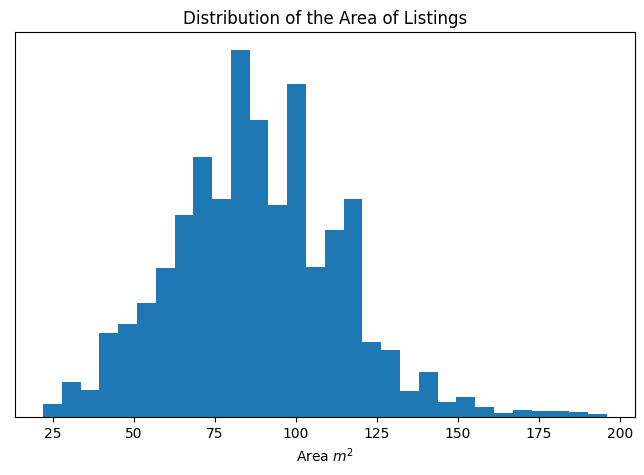

In [37]:
df1 = df[df.area < 200]
plot = df1.area.hist(bins=30, figsize=(8, 5), grid=False)
plot.get_yaxis().set_visible(False)
plot.set_xlabel('Area $m^2$')
plot.set_title('Distribution of the Area of Listings')

Text(0.5, 1.0, 'Distribution of Prices')

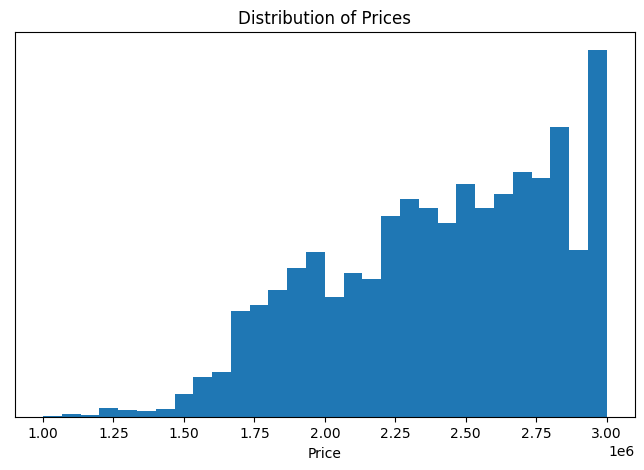

In [38]:
plot = df.price.hist(bins=30, figsize=(8, 5), grid=False)
plot.get_yaxis().set_visible(False)
plot.set_xlabel('Price')
plot.set_title('Distribution of Prices')

Text(0.5, 1.0, 'Distribution of Dates Listed')

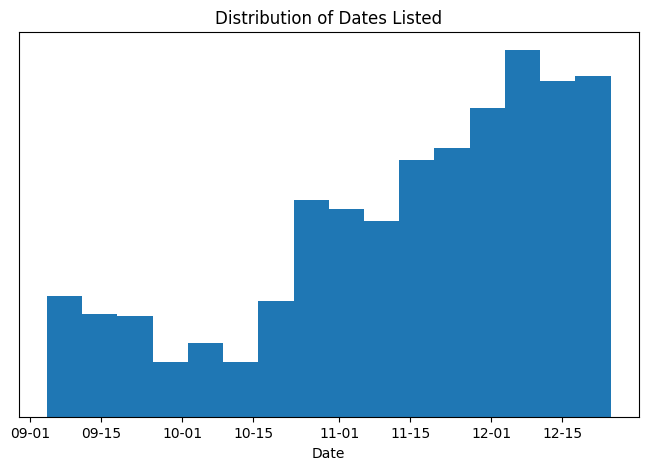

In [61]:
import matplotlib

plot = df.date_listed.hist(bins=16, figsize=(8, 5), grid=False)
plot.get_yaxis().set_visible(False)
plot.set_xlabel('Date')
plot.get_xaxis().set_major_formatter(matplotlib.dates.DateFormatter('%m-%d'))
plot.set_title('Distribution of Dates Listed')

Text(0.5, 1.0, 'Day of the Week Listed')

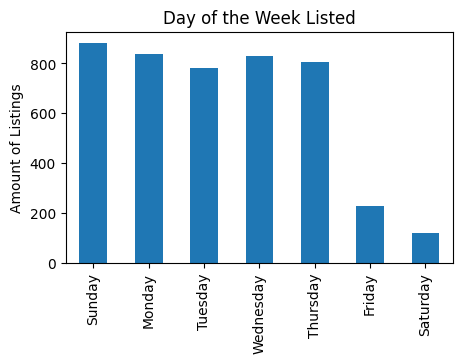

In [52]:
import calendar

WEEKDAYS = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plot = pd.Series([calendar.day_name[date.weekday()] for date in df.date_listed]).value_counts().\
    sort_index(key=lambda day_names: [WEEKDAYS.index(day_name) for day_name in day_names]).plot.bar(figsize=(5,3))
plot.set_ylabel('Amount of Listings')
plot.set_title('Day of the Week Listed')

Text(0.5, 1.0, 'Distribution of Number of Rooms')

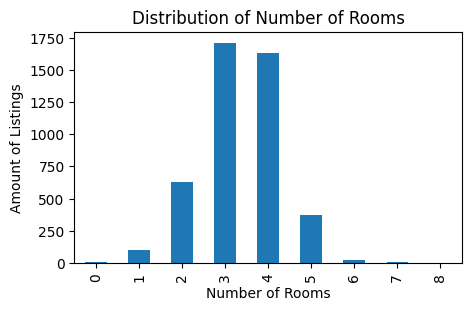

In [60]:
plot = df.rooms.value_counts().sort_index().plot.bar(figsize=(5,3))
plot.set_xlabel('Number of Rooms')
plot.set_ylabel('Amount of Listings')
plot.set_title('Distribution of Number of Rooms')

Text(0.5, 1.0, 'Time of Day Listings Were Posted')

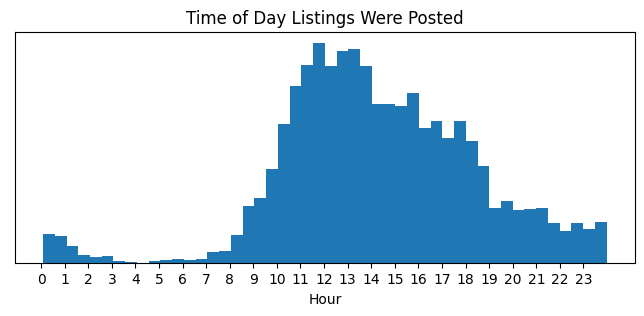

In [63]:
plot = pd.Series([date_listed.time().hour + date_listed.time().minute / 60 for date_listed in df.date_listed])\
    .hist(bins=48, figsize=(8, 3), grid=False)
plot.get_yaxis().set_visible(False)
plot.get_xaxis().set_ticks([i for i in range(0, 24, 1)])
plot.set_xlabel('Hour')
plot.set_title('Time of Day Listings Were Posted')

Text(0.5, 1.0, 'Distribution of Floor Number')

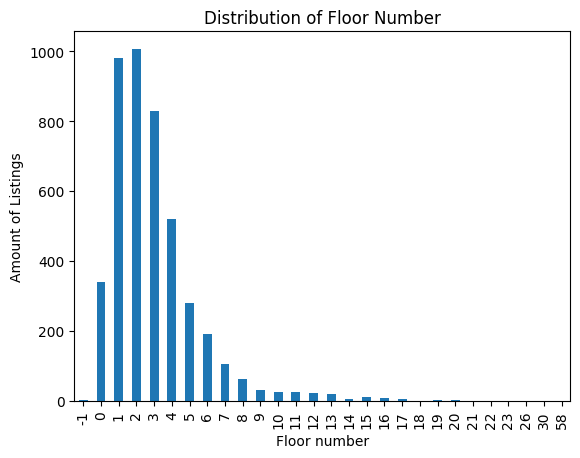

In [9]:
plot = df.floor.value_counts().sort_index().plot.bar()
plot.set_xlabel('Floor number')
plot.set_ylabel('Amount of Listings')
plot.set_title('Distribution of Floor Number')

Text(0.5, 1.0, 'Amount of Listings, and the Price per Square Meter, for each City')

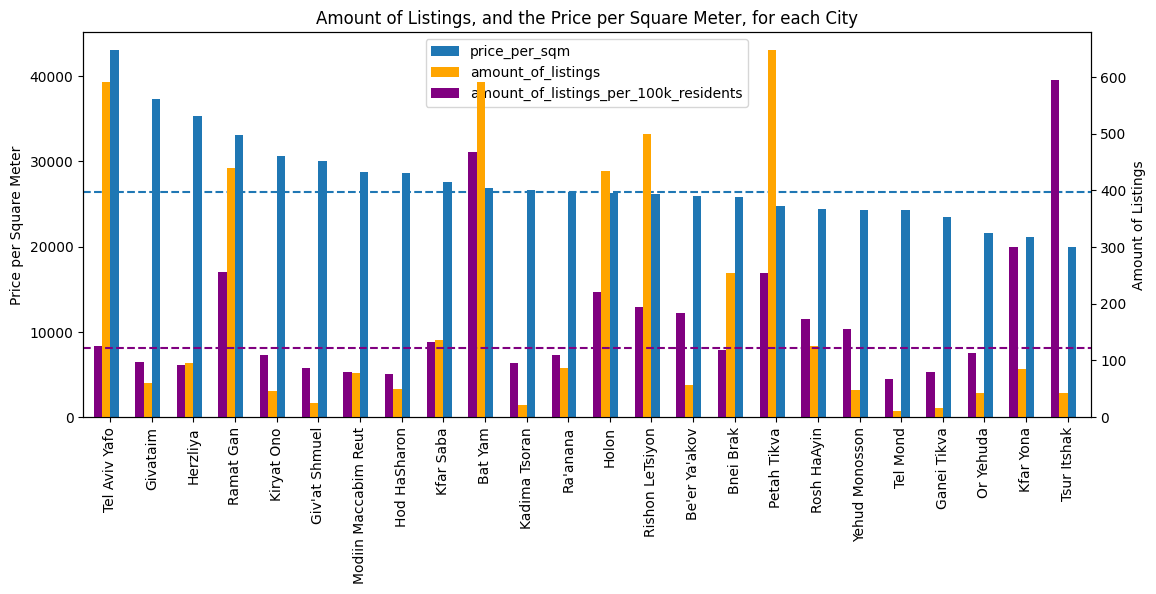

In [10]:
# create df
CITY_POPULATIONS = {'Ramat HaSharon': 48001, 'Tel Aviv Yafo': 470563, 'Givataim': 61346, 'Herzliya': 104083,
                    'Ramat Gan': 170221, 'Kiryat Ono': 42050, 'Giv\'at Shmuel': 28510, 'Modiin Maccabim Reut': 97604,
                    'Hod HaSharon': 65601, 'Kfar Saba': 101823, 'Kadima Tsoran': 23000, 'Bat Yam': 126265,
                    'Ra\'anana': 79010, 'Holon': 196734, 'Rishon LeTsiyon': 257391, 'Be\'er Ya\'akov': 30301,
                    'Bnei Brak': 214292, 'Petah Tikva': 252916, 'Yehud Monosson': 30814, 'Ganei Tikva': 21471,
                    'Rosh HaAyin': 72569, 'Tel Mond': 14517, 'Or Yehuda': 37055, 'Kfar Yona': 28328, 'Tsur Itshak': 7048}
amount_of_listings = df.city.value_counts()
amount_of_listings.name = 'amount_of_listings'
df['price_per_sqm'] = df.price / df.area
prices_per_sqm = df.groupby('city').mean(numeric_only=True)['price_per_sqm'].sort_values(ascending=False).astype(int)
df = df.drop('price_per_sqm', axis=1)
cities_df = pd.merge(prices_per_sqm, amount_of_listings, left_index=True, right_index=True)
cities_df = cities_df.assign(city_population=CITY_POPULATIONS)
cities_df['amount_of_listings_per_100k_residents'] = ((cities_df.amount_of_listings / cities_df.city_population) * 100000).astype(int)
median_amount_of_listings_per_100k_residents = cities_df.amount_of_listings_per_100k_residents.median()
median_price_per_sqm = cities_df.price_per_sqm.median()

# plotting
fig, ax = plt.subplots()
ax2 = ax.twinx()
cities_df.price_per_sqm.plot.bar(ax=ax, width=0.2, position=0)
cities_df.amount_of_listings.plot.bar(ax=ax2, width=0.2, color='orange', position=1)
cities_df.amount_of_listings_per_100k_residents.plot.bar(ax=ax2, width=0.2, color='purple', position=2)
ax.set_ylabel('Price per Square Meter')
ax2.set_ylabel('Amount of Listings')
ax.set_xlim(right=(ax.get_xlim()[1] + 0.25))
ax2.set_xlim(right=(ax2.get_xlim()[1] + 0.25))
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.axhline(y=median_price_per_sqm, linestyle='--')
ax2.axhline(y=median_amount_of_listings_per_100k_residents, color='purple', linestyle='--')
ax.legend(lines + lines2, labels + labels2, loc='upper center')
fig.set_size_inches(13, 5)
ax.set_title('Amount of Listings, and the Price per Square Meter, for each City')

In [11]:
# Ideas for graphs:
# stats of the median apartment properties per city per price point for top 5-10 cities
# gather rent listings and match apartemnts with same city & area (in buckets of 10-20) to find price/rent ratios

In [12]:
# display(df.neighborhood.value_counts())
display(df)
d1 = df.copy()
# d1.area = [round(area, -1) for area in df.area]
_, area_bins = pd.qcut(df.area, 10, retbins=True)
_, price_bins = pd.qcut(df.price, 10, retbins=True)
display(area_bins, price_bins)

,date_listed,city,neighborhood,street,coordinates,floor,rooms,area,price
0,2022-12-12 08:22:26,Kfar Saba,ארלוזורוב,גאולה,"{'latitude': 32.173921, 'longitude': 34.899314}",2,4,110,2850000
1,2022-12-19 22:21:56,Ra'anana,מרכז דרום,הרצוג,"{'latitude': 32.179599, 'longitude': 34.87328}",0,4,106,2700000
2,2022-12-09 12:12:02,Kfar Saba,ארלוזורוב,אברהם קרן,"{'latitude': 32.170754, 'longitude': 34.91112}",2,4,121,2990000
3,2022-12-05 14:05:33,Tsur Itshak,צור יצחק,נחל אלכסנדר,"{'latitude': 32.2390738181818, 'longitude': 34...",6,4,138,2450000
4,2022-12-04 14:31:01,Ra'anana,קרית ויצמן,None,"{'latitude': 32.185308, 'longitude': 34.866941}",1,4,132,2870000
...,...,...,...,...,...,...,...,...,...
4479,2022-12-05 15:43:06,Modiin Maccabim Reut,המגינים,חטיבת גבעתי,"{'latitude': 31.9113633658537, 'longitude': 35...",2,4,106,2850000
4480,2022-10-27 14:37:11,Petah Tikva,None,None,"{'latitude': 32.084951, 'longitude': 34.886825}",3,3,70,1620000
4481,2022-12-21 13:45:11,Rishon LeTsiyon,נאות שקמה,הרבי מלובביץ',"{'latitude': 31.9742821923077, 'longitude': 34...",1,3,72,2649000
4482,2022-10-03 14:42:29,Bat Yam,"דרום חדש, פארק הים",נעמי שמר,"{'latitude': 32.007124, 'longitude': 34.740614}",16,3,70,2990000


array([ 22.,  55.,  66.,  75.,  80.,  88.,  95., 100., 110., 120., 452.])

array([1000000., 1820000., 1999999., 2197700., 2300000., 2450000.,
       2590000., 2690000., 2800000., 2900000., 3000000.])